# Importing Libraries

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In [17]:
data=pd.read_csv("boston-housing/train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


# Visualization with target varibale

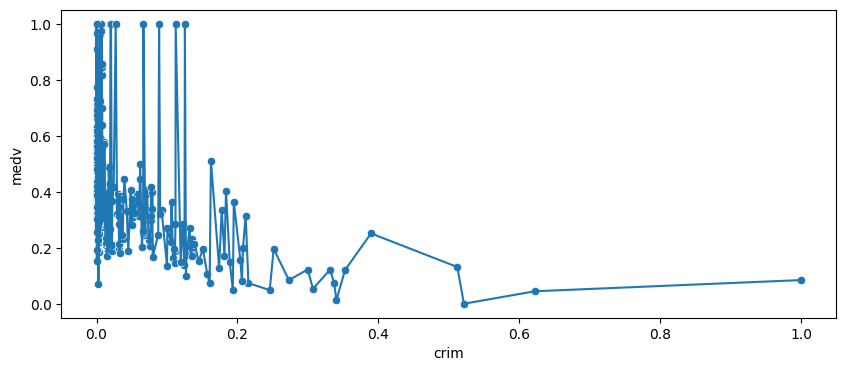

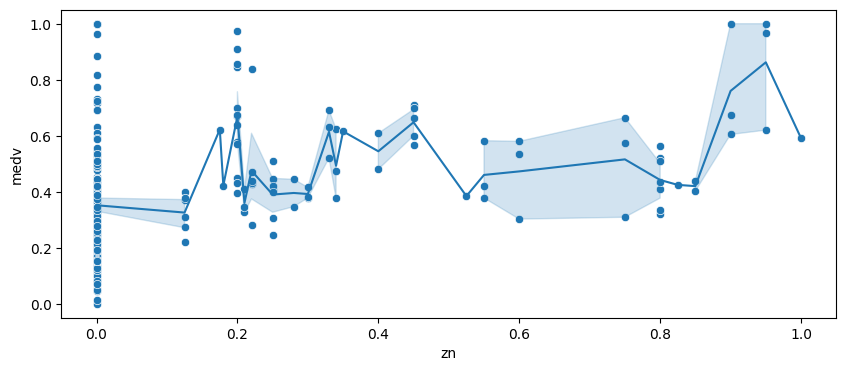

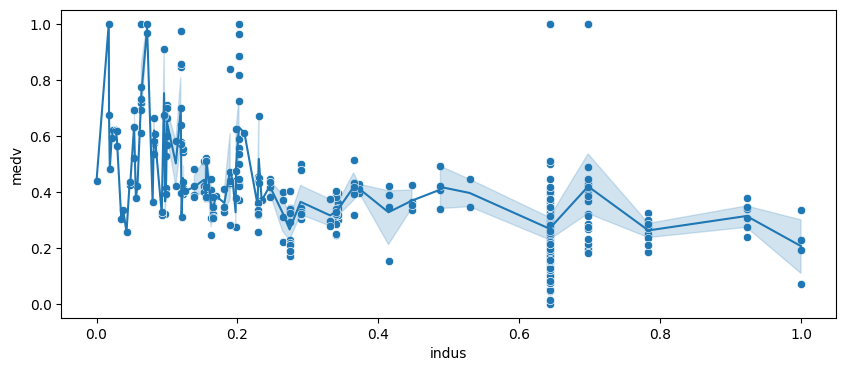

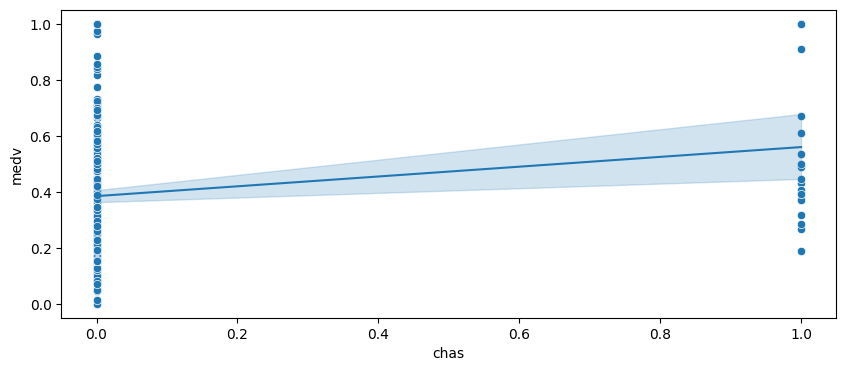

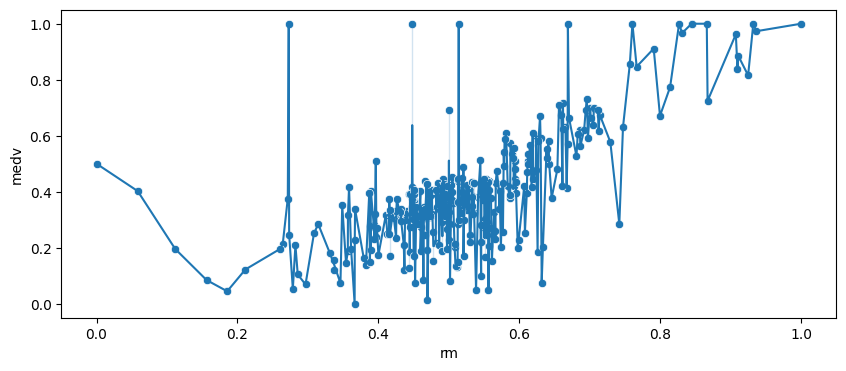

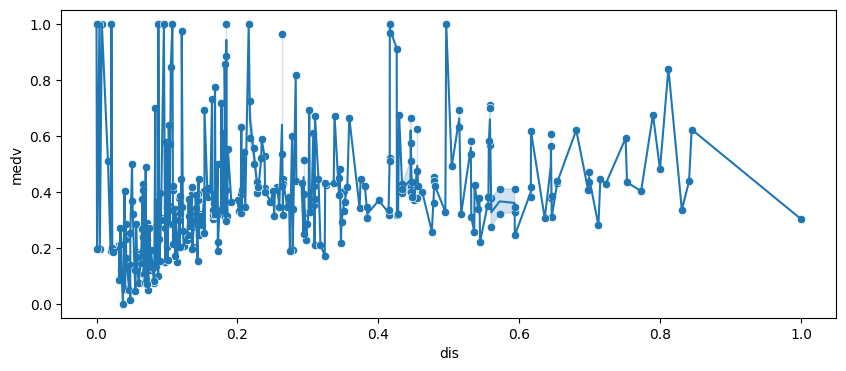

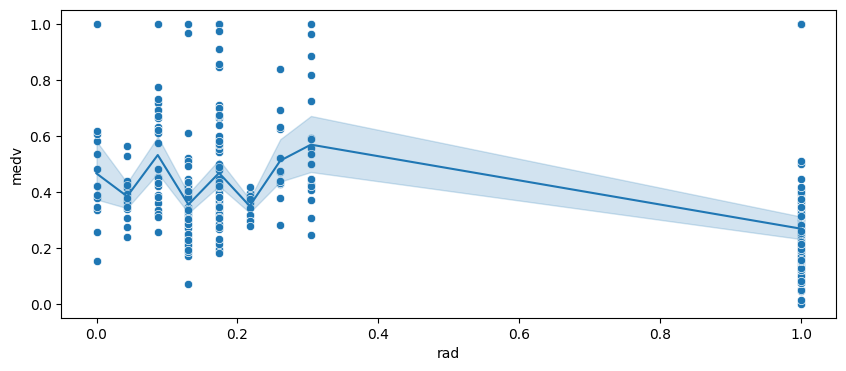

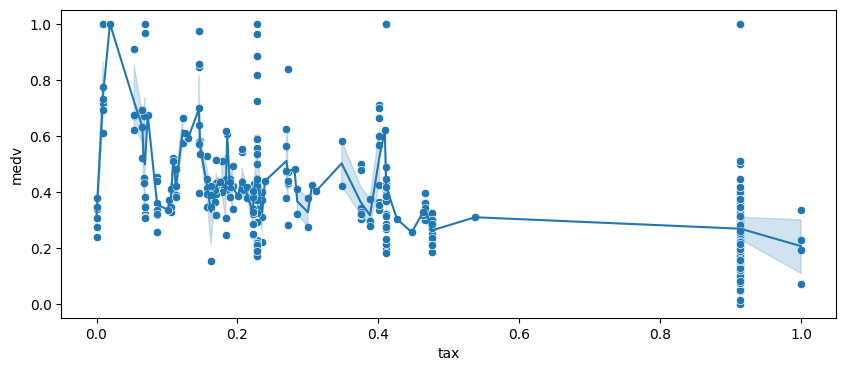

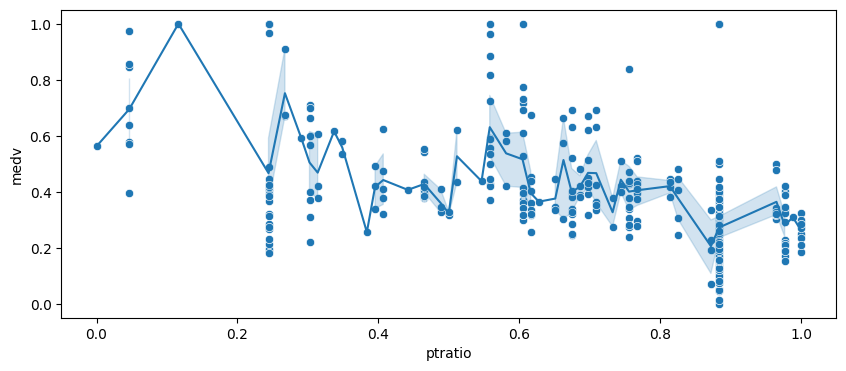

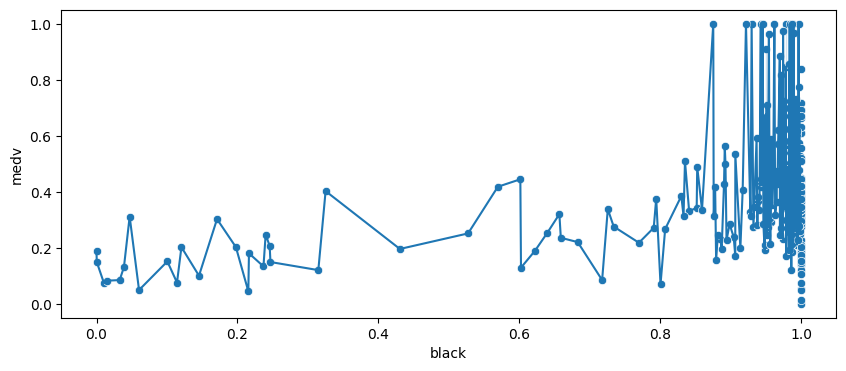

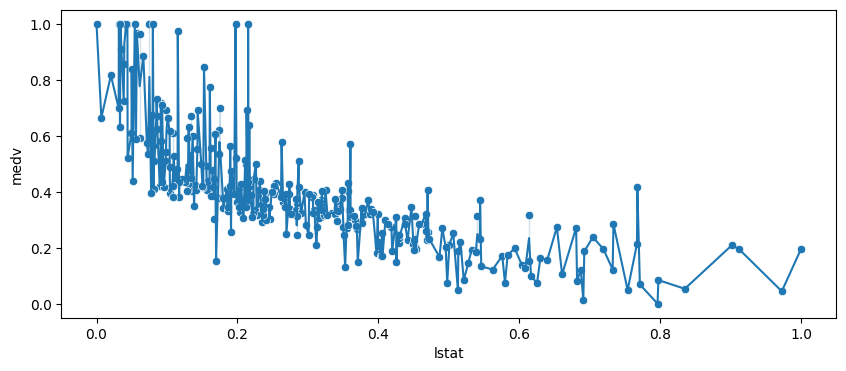

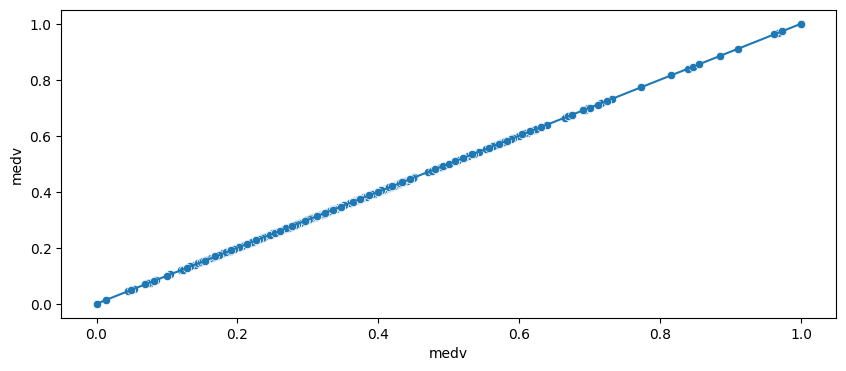

In [35]:
for i in data.columns:
    plt.rcParams["figure.figsize"] = (10, 4)
    sns.scatterplot(x=i,y='medv',data=data)
    sns.lineplot(x=i,y='medv',data=data)
    plt.show()

# HeatMap of Spearmen Correlation

<AxesSubplot: >

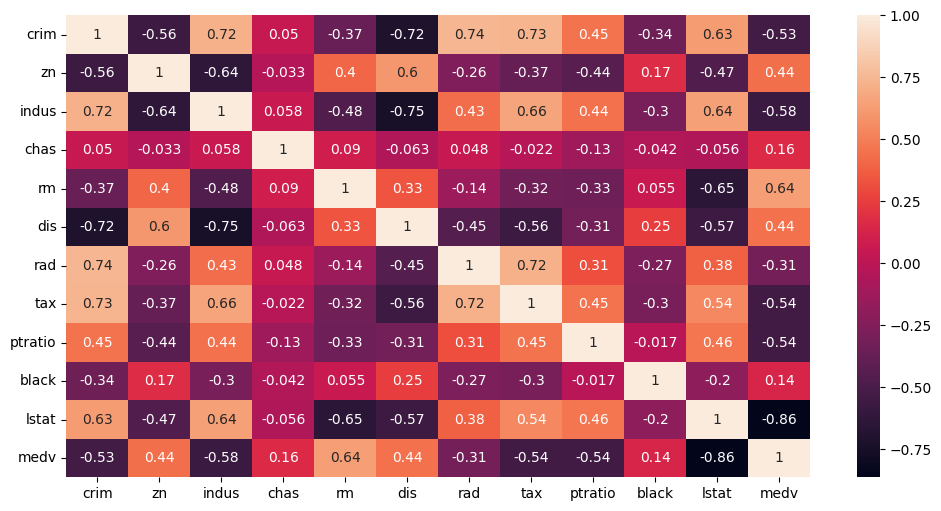

In [36]:
plt.rcParams["figure.figsize"] = (12, 6)
sns.heatmap(data.corr(method='spearman'),annot=True)

'nox' and 'age' are dropped because of strong correlations with 'crim' and 'dis' respectively

In [26]:
data=data.drop(['ID','nox','age'],axis=1)
data.head()

,crim,zn,indus,chas,rm,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,6.575,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,6.421,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,6.998,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,7.147,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,6.012,5.5605,5,311,15.2,395.60,12.43,22.9


# Checking Nulls

In [27]:
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
rm         0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

# Min Max Scaling

In [28]:
def min_max_scaling(column):
    return ((column-column.min())/(column.max()-column.min())*(1-0)+0)

for i in data.columns:
    data[i]=min_max_scaling(data[i])

data.head()

,crim,zn,indus,chas,rm,dis,rad,tax,ptratio,black,lstat,medv
0,0.000000,0.180,0.058148,0.0,0.583656,0.308996,0.000000,0.206501,0.313953,1.000000,0.089680,0.422222
1,0.000285,0.000,0.234444,0.0,0.553834,0.400545,0.043478,0.103250,0.604651,1.000000,0.204470,0.368889
2,0.000354,0.000,0.053333,0.0,0.665569,0.514848,0.086957,0.065010,0.709302,0.994230,0.033389,0.631111
3,0.000853,0.000,0.053333,0.0,0.694423,0.514848,0.086957,0.065010,0.709302,1.000000,0.099338,0.693333
4,0.001115,0.125,0.264074,0.0,0.474632,0.462482,0.173913,0.235182,0.302326,0.996695,0.295254,0.397778


# Train Test Data Split

In [29]:
Y=data['medv']
X=data.drop(['medv'],axis=1)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.75,random_state=16)

# Fitting Model

In [32]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_test, y_test))

0.7137644246684032


R-Squared = 0.7137644246684032

It means the model is able to predict 70% of unseen values.